# Finding the Max Sharpe Ratio Portfolio

In [26]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import risk_kit as rk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
ind= rk.get_ind_returns()
er= rk.annualized_rets(ind['1996':'2000'], 12)
cov= ind['1996':'2000'].cov()

In [28]:
#We've add the code to our module kit file
def msr(riskfree_rate, er, cov):
    """
    riskfree rate + ER + Cov -> W
    """
    n = er.shape[0]                 #Number of assets
    init_guess = np.repeat(1/n, n)  #Initial guess
    bounds = ((0, 1), ) *n          #A sequence of bounds for every weights
    weights_sum_to_1= {
        'type':'eq', #equal
        'fun': lambda weights: np.sum(weights) - 1
    }

    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the share ratio, given weights
        """
        r = rk.portfolio_return(weights, er)
        vol= rk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol  

    results = minimize(neg_sharpe_ratio, init_guess,  #Minimizing the Negative Sharpe Ratio is exactly the same as maximizing the Sharpe Ratio
                      args=(riskfree_rate, er, cov,), method="SLSQP", #This method = Quadratic Optimizer
                      options={'disp': False},
                      constraints = (weights_sum_to_1),
                      bounds = bounds 
                      )
    return results.x #pass back a variable collects in that structure

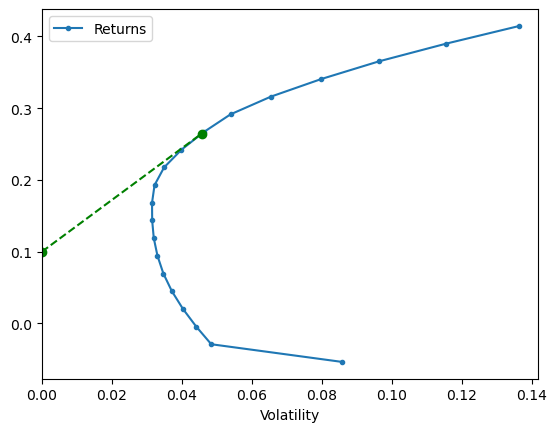

In [29]:
#We've add the code below to the plot_ef function in our module kit file
ax = rk.plot_ef(20, er, cov)
ax.set_xlim(left= 0)
rf = 0.1 # Assume riskfree rate =10%
w_msr = msr(rf, er, cov) # Get the weights of the MSR Portfolio
r_msr = rk.portfolio_return(w_msr,er) 
vol_msr = rk.portfolio_vol(w_msr, cov)
#Add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color= 'green', marker= 'o', linestyle= 'dashed')

The green line is CML and big dot is the MSR portfolio.


<AxesSubplot:xlabel='Volatility'>

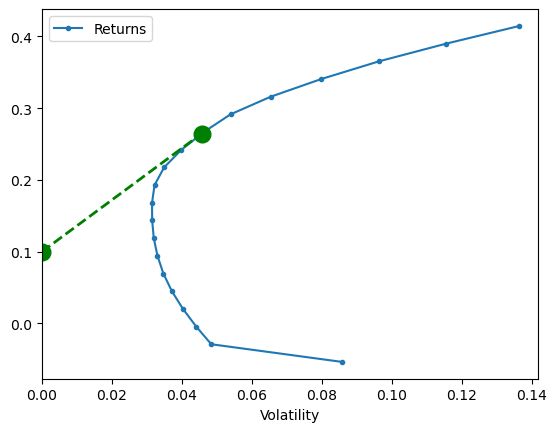

In [33]:
#Let's try the module in the kit file
rk.plot_ef(20, er, cov, show_cml= True, riskfree_rate= 0.1)

It works great as we expected.